In [1]:
import pandas as pd

import numpy as np

import matplotlib as plt

from pylab import *

In [2]:
df=pd.read_csv("/home/franciscoeas/Actividad 6/ensenada1.csv",header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.head(5)

,anio,mes,dia,hora(utc),altura(mm),date
0,2016,1,1,0,672,2016-01-01 00:00:00
1,2016,1,1,1,499,2016-01-01 01:00:00
2,2016,1,1,2,368,2016-01-01 02:00:00
3,2016,1,1,3,308,2016-01-01 03:00:00
4,2016,1,1,4,329,2016-01-01 04:00:00


In [5]:
df.describe()

,anio,mes,dia,hora(utc),altura(mm)
count,744.0,744.0,744.000000,744.000000,744.000000
mean,2016.0,1.0,16.000000,11.500000,800.434140
std,0.0,0.0,8.950289,6.926843,469.573649
min,2016.0,1.0,1.000000,0.000000,-318.000000
25%,2016.0,1.0,8.000000,5.750000,517.000000
50%,2016.0,1.0,16.000000,11.500000,786.500000
75%,2016.0,1.0,24.000000,17.250000,1108.750000
max,2016.0,1.0,31.000000,23.000000,1888.000000


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
date          0
dtype: int64

In [7]:
df.columns

Index(['anio', 'mes', 'dia', 'hora(utc)', 'altura(mm)', 'date'], dtype='object')

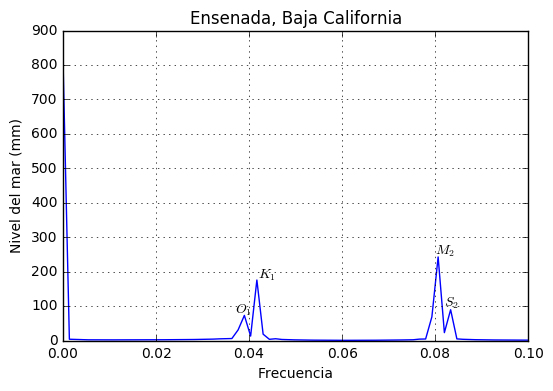

In [19]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 744
# sample spacing
T = 1
x = df['dia']
y = df['altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0,0.1)
plt.title('Ensenada, Baja California')
plt.xlabel('Frecuencia')
plt.ylabel('Nivel del mar (mm)')
plt.text(0.08,250,'$M_{2}$')
plt.text(0.037,80,'$O_{1}$')
plt.text(0.042,180,'$K_{1}$')
plt.text(0.082,100,'$S_{2}$')
plt.grid()
plt.show()
  